## Estadística Aplicada

Sesión 7 - 5 septiembre 

Bárbara Govea Serna

1902869

Grupo 42

In [1]:
# Librerias Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
# Librerias Especializadas
from lifelines import ExponentialFitter

In [8]:
recaida = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')
recaida

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


In [19]:
# Calculando la exponencial con esta funcion, fit es para estimar le debmos dar el tiempo de supervivencia, y el indicador de censura
exponen = ExponentialFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [20]:
print(exponen.print_summary())
# Va a resultar un warning

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>
   number of observations = 10
number of events observed = 6
           log-likelihood = -26.41
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.00      12.25             6.00            54.00

          cmp to    z    p   -log2(p)
lambda_     0.00 2.45 0.01       6.13
---
AIC = 54.81

None


In [22]:
# a) Tasa de riesgo con la funcion hazard
exponen.hazard_

# El riesgo es constante 

,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333


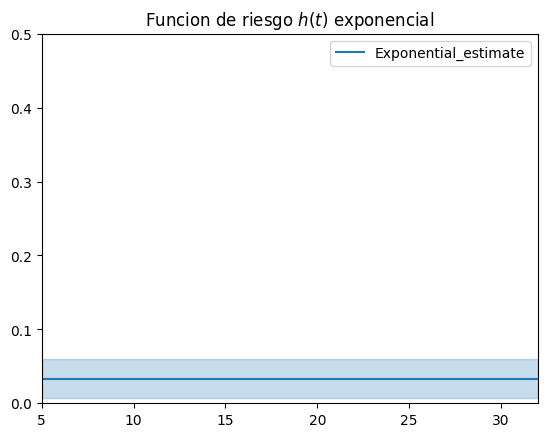

In [28]:
# Graficar la funcion de riesgo
exponen.plot_hazard()
plt.title('Funcion de riesgo $h(t)$ exponencial')
plt.xlim(5,32)
plt.ylim(0,.5);

In [35]:
# b) La probabilidad de no recaer en 16 meses S(16)
s16 = exponen.survival_function_at_times(16)
print(f'La probabilidad de no recaer en 16 meses es de:{s16}')

La probabilidad de no recaer en 16 meses es de:16    0.586646
Name: Exponential_estimate, dtype: float64


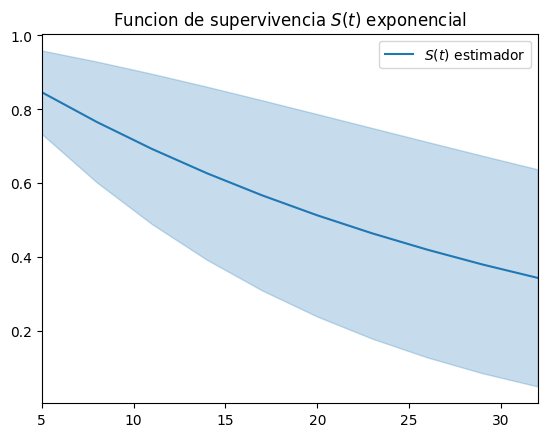

In [50]:
# Función de supervivencia s(t) de una exponencial
exponen.plot_survival_function(label = '$S(t)$ estimador')
plt.title('Funcion de supervivencia $S(t)$ exponencial')
plt.xlim(5,32);

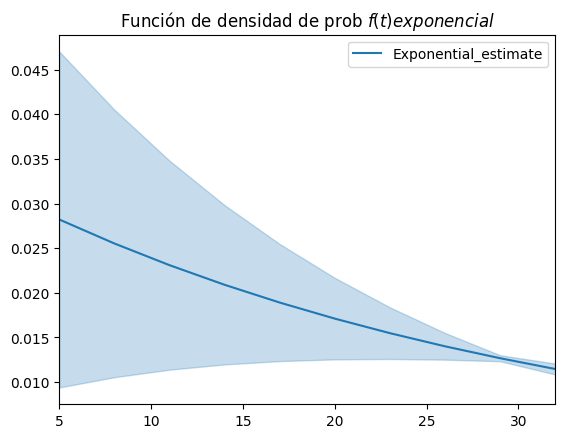

In [51]:
## f(t) función de densidad de probabilidad de exponencial
exponen.plot_density()
plt.title('Función de densidad de prob $f(t) exponencial$')
plt.xlim(5,32);

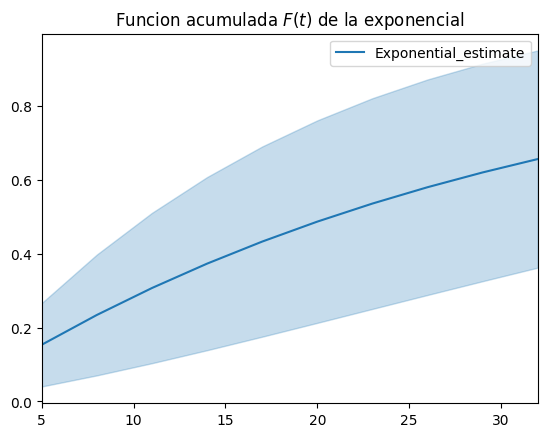

In [52]:
# F(t) acumulada 
exponen.plot_cumulative_density()
plt.title('Funcion acumulada $F(t)$ de la exponencial')
plt.xlim(5,32);

## Vamos a suponer que los datos se distribuyen como una weibull

In [44]:
from lifelines import WeibullFitter

In [45]:
# Calculando la weibull con esta funcion, fit es para estimar le debmos dar el tiempo de supervivencia, y el indicador de censura
mweibull = WeibullFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [46]:
# Parametro gamma
mweibull.rho_

1.8867259500116444

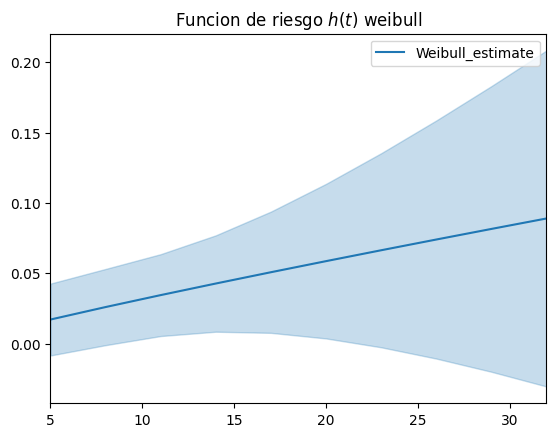

In [48]:
# Graficando la función de riesgo h(t)
mweibull.plot_hazard()
plt.title('Funcion de riesgo $h(t)$ weibull')
plt.xlim(5,32);

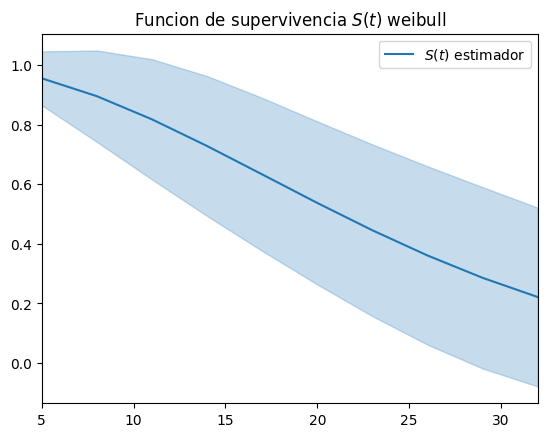

In [49]:
# Función de supervivencia s(t) de una weibull
mweibull.plot_survival_function(label = '$S(t)$ estimador')
plt.title('Funcion de supervivencia $S(t)$ weibull')
plt.xlim(5,32);

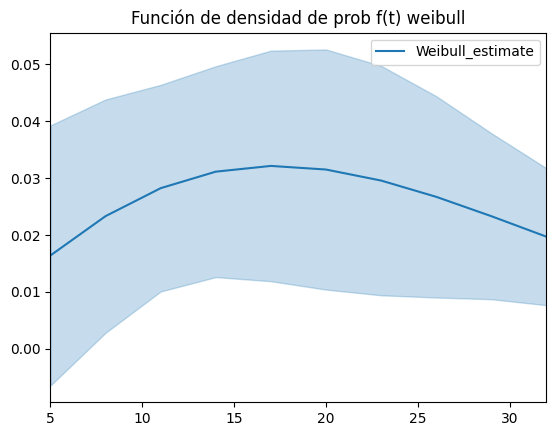

In [55]:
## f(t) función de densidad de probabilidad de weibull
mweibull.plot_density()
plt.title('Función de densidad de prob f(t) weibull')
plt.xlim(5,32);

## Vamos a suponer que tiempo de supervivencia de los datos se distribuyen como una lognormal

In [57]:
from lifelines import LogNormalFitter

In [59]:
# Calculando la lognormal con esta funcion, fit es para estimar le debmos dar el tiempo de supervivencia, y el indicador de censura
llognormal = LogNormalFitter().fit(recaida[' tiempo'], recaida[' estado'])

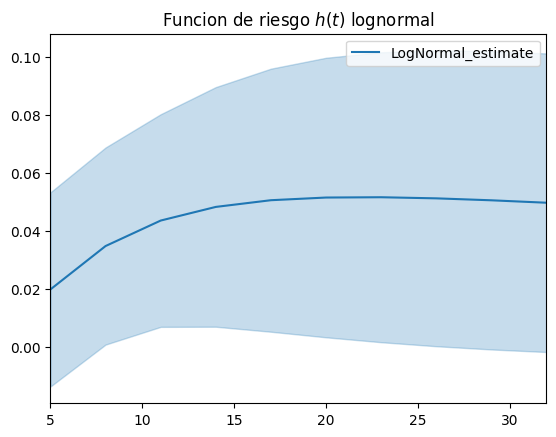

In [60]:
# Graficando la función de riesgo h(t)
llognormal.plot_hazard()
plt.title('Funcion de riesgo $h(t)$ lognormal')
plt.xlim(5,32);

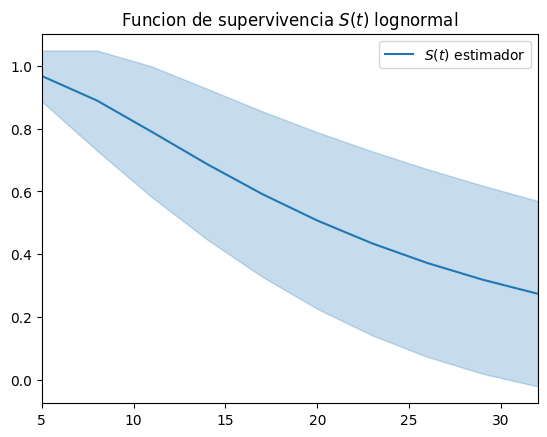

In [62]:
# Función de supervivencia s(t) de una lognormal
llognormal.plot_survival_function(label = '$S(t)$ estimador')
plt.title('Funcion de supervivencia $S(t)$ lognormal')
plt.xlim(5,32);

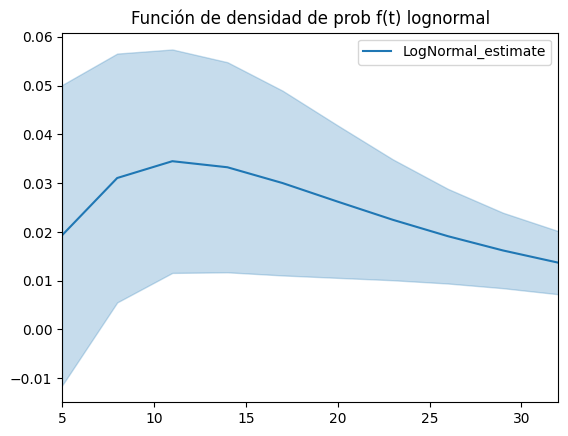

In [63]:
## f(t) función de densidad de probabilidad de weibull
llognormal.plot_density()
plt.title('Función de densidad de prob f(t) lognormal')
plt.xlim(5,32);

## ¿El tiempo de supervivencia de recaida es exponencial, weibull o lognormal?

### El criterio de Akaike (Akaike Information Criteria AIC) sirve para elegir el mejor modelo

## $AIC = -ln(Verosimilitud) + 2k $ 

### donde k es el numero de parametros del modelo de regresión
## El mejor modelo es el que tiene el menor valor de AIC, ya que AIC prefiere modelos simples

In [72]:
print('AIC Exponencial:',exponen.AIC_.round(2),'AIC Weibull:',mweibull.AIC_.round(2),'AIC Lognormal:',llognormal.AIC_.round(2))


AIC Exponencial: 54.81 AIC Weibull: 54.16 AIC Lognormal: 54.51


In [74]:
print('Segun el criterio de AIC, el "mejor" modelo es: el modelo Weibull, al representar un valor menor y el riesgo de recaida es creciente')

Segun el criterio de AIC, el "mejor" modelo es: el modelo Weibull, al representar un valor menor y el riesgo de recaida es creciente
